# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 03 (23-October-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [1]:
import numpy as np
from IPython.display import Image

---
## Question 2: (*Problem 2.1*) 
The delta rule described in Eq. (2.3) and Hebb's rule Eq. (2.9) represent two different methods of learning. List the features that distinguish these two rules from each other.
\begin{equation}\tag{2.3}
\Delta w_{kj}(n) = \eta e_k(n)x_j(n) 
\end{equation}

\begin{equation}\tag{2.9} 
\Delta w_{kj}(n) = \eta y_k(n)x_j(n) 
\end{equation} 

Where,

$\eta$ is a positive constant that determines the rate of learning,

$w_{kj}$ is the synaptic weight of neuron $k$ excited by the element $x_j(n)$,

$\Delta w_{kj}(n)$ is the adjustment applied to synaptic weight $w_{kj}$ at time step $n$,

$e_k(n)$ is the error signal, 

$y_k$ is the output signal (postsynaptic activity).

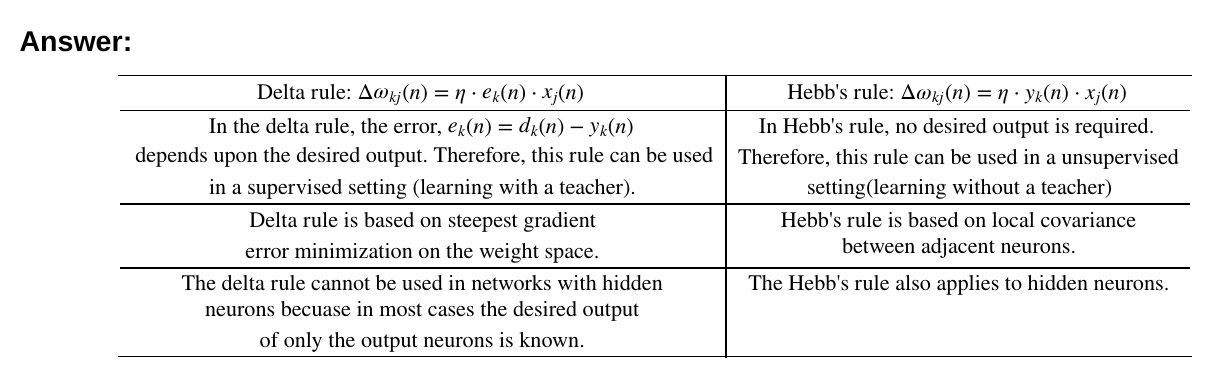

In [2]:
Image("images/problem_2.1.png",width=1200)

---
## Question 3: (*Problem 2.10*)
Formulate the expression for the output $y_i$ of neuron $j$ in the network of Fig 2.4. You may use the following:

$x_i$ = $i$th input signal

$w_{ji}$ = synaptic weight from input $i$ to neuron $j$

$c_{kj}$ = weight of lateral connection from neuron $k$ to neuron $j$ 

$v_j$ = induced local field of neuron $j$ 

$y_j$ = $\varphi(v_j)$ 

What is the condition that would have to be satisfied for neuron $j$ to be the winning neuron?

 <!--<img src="images/Fig_2.4.png">screenshot from Haykin’s book, Chapter 2-->



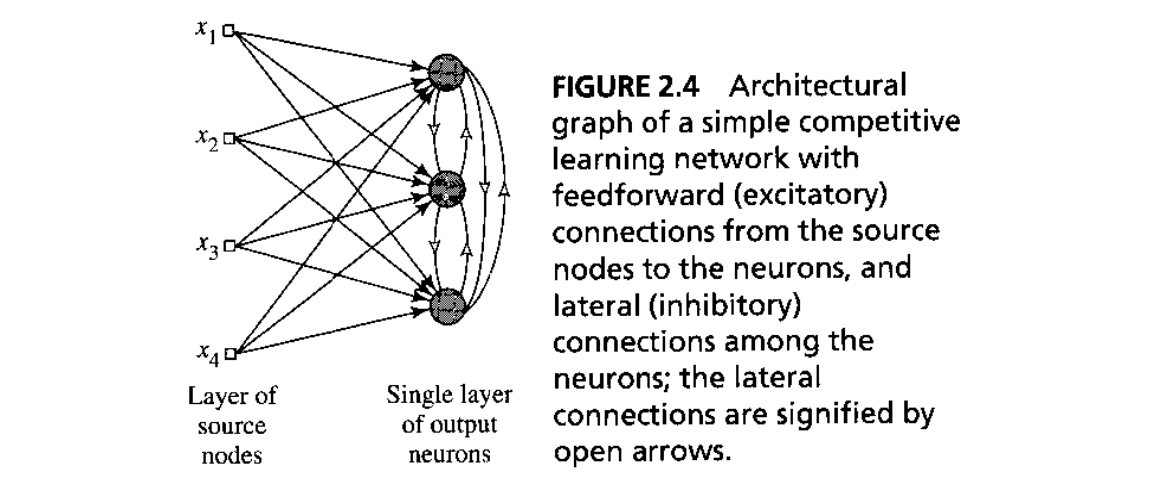

In [3]:
Image("images/Fig_2.4.png") #screenshot from Haykin’s book, Chapter 2

### Answer:

The expression of output neuron $y_j$:

$$ y_j = \varphi(\Sigma_{i=1}^{4} x_i \cdot \omega_{ji} + \Sigma_{k=1}^{3} c_{kj} \cdot \varphi(v_k)), \hspace{5mm}  k \neq j $$

A neuron j is winning if: 

$$ y_j > y_k, \hspace{5mm} j \neq k, \hspace{5mm} k = 1,2,3 $$

---
## Question 4:  (*Problem 2.21*)
Figure P2.21  shows the block diagram of an adaptive system. The input signal to the _predictive model_ is defined by past values of a process, as shown by 

\begin{equation}
x(n-1)= [x(n-1),x(n-2),...,x(n-m)]
\end{equation} 

The model output, $\hat{x}(n)$, represents an _estimate_ of the present value, $x(n)$, of the process. The _comparator_ computes the error singal

\begin{equation} 
e(n) = x(n) - \hat{x}(n) 
\end{equation} 
<!--<img src="images/Fig_P2.21.png"> screenshot from Haykin’s book, Chapter 2-->

which in turn applies a correction to the adjustable parameters of the model. It also supplies an output singal for transfer to the next level of neural processing of interpretation. By repeating this operation on a level-by-level basis, the information processed by the system tends to be progressively higher quality (Mead, 1990). 

Fill in the details of the level of signal processing next to that described in P2.21

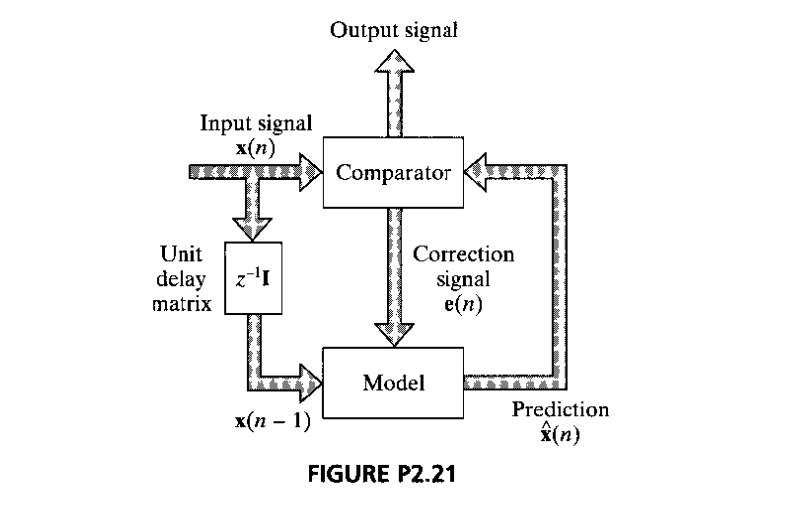

In [4]:
Image("images/Fig_P2.21.png") #screenshot from Haykin’s book, Chapter 2

### Answer:
- The prediction signal, $\hat x(n)$, is generated by the Model using a delayed input ($x(n-1)$) and the coorection signal $e(n)$.
- The correction signal $e(n)$ is generated by comparing the current signal to the predicted signal
- The input signal $x(n)$ is passed through a Unit delay matrix to get $x(n-1)$. 
- The correction signal $e(n)$ is used to update the model.
- On repeating the above, we can imporove the model prediction, thus get better estimates.

---
## Question 5: 
A simple network is given below (from lecture slides). You have to update the weights once using Boltzmann learning for this network. Please do calculations by hand or by using Python. 

<!--<img src="images/Fig_Q5.png">-->

Use random numbers to initialise the weights. For training use a training set as $[(0, 1), (1, 0)]$ or any training set of your choice.

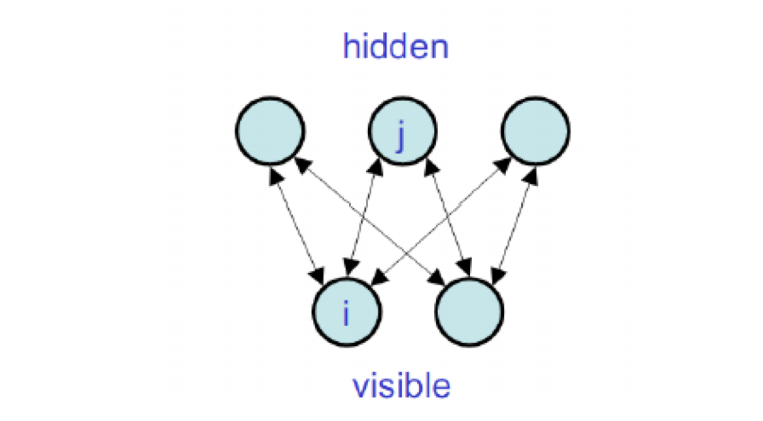

In [5]:
Image("images/Fig_Q5.png") #screenshot from Haykin’s book, Chapter 2

### Answer:
The code is based on the github code in this link: [GitHub](https://github.com/echen/restricted-boltzmann-machines/blob/master/rbm.py)

Also, the following blog has been referred to: [Introduction to Restricted Boltzmann Machines](http://blog.echen.me/2011/07/18/introduction-to-restricted-boltzmann-machines/)

In [6]:
# boltzmann learning

hidden_neurons = 3
visible_neurons = 2

# random seed to get same random values everytime..
np.random.seed(0)
input_data = np.array([[0., 1.], [1., 0.]])

# number of data points...
number_data = input_data.shape[0]
learning_rate = 0.1

# zero centered weights generated from normal distribution..
weights = np.random.normal(0, 1, (visible_neurons, hidden_neurons))
# clamp visible states to input..
visible_state = input_data
print 'Initial state of visible neurons: '
print visible_state
print '---------------------------------------'
# random hidden states..
hidden_state = np.random.randint(0, 1, (number_data, hidden_neurons))
print 'Initial state of hidden neurons: '
print hidden_state
print '---------------------------------------'
print 'Initial random weights: '
print weights

Initial state of visible neurons: 
[[ 0.  1.]
 [ 1.  0.]]
---------------------------------------
Initial state of hidden neurons: 
[[0 0 0]
 [0 0 0]]
---------------------------------------
Initial random weights: 
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]


In [7]:
def logistic_function(v):
    return 1/(1+np.exp(-v))

In [8]:
# local filed of hidden neurons in clamped condition..
clamped_hid_v = input_data.dot(weights)
# flipping probability of hidden neurons..
flip_prob_clamped_hidden = logistic_function(clamped_hid_v)
print 'Hidden state probabilities: '
print flip_prob_clamped_hidden
print '---------------------------------------'

# clamped condition..
clamped_correlation = input_data.T.dot(flip_prob_clamped_hidden)
print 'Positive correlation in clamped condition: '
print clamped_correlation
print '---------------------------------------'
# flip hidden states based on flipping probability...
np.random.seed() # randomize flip_hidden..
flip_hidden = flip_prob_clamped_hidden > (
    np.random.rand(number_data, hidden_neurons))
hidden_state = np.abs(hidden_state - flip_hidden)
print 'Flipped hidden states: '
print hidden_state
print '---------------------------------------'

# network now runs free without effect of external input...
# local field of visible neurons in free running state..
free_run_vis_v = hidden_state.dot(weights.T) 
# flipping probability of visible neurons..
flip_prob_free_visible = logistic_function(free_run_vis_v)
# flip visible neuron states based on flipping probability...
np.random.seed() # randomize flip_visible..
flip_visible = flip_prob_free_visible > (
    np.random.rand(number_data, visible_neurons))
visible_state = np.abs(visible_state - flip_visible)
print 'Flipped visible states: '
print visible_state
print '---------------------------------------'

# local filed of hidden neurons in free running state..
free_run_hid_v = visible_state.dot(weights)
# flipping probability of hidden neurons..
flip_prob_free_hidden = logistic_function(free_run_hid_v)
print 'Updated hidden probabilites in free running condition: '
print flip_prob_free_hidden
print '---------------------------------------'

# free running condition..visible and hidden neurons used..
free_run_correlation = visible_state.T.dot(flip_prob_free_hidden)
print 'Negative correlation in free running condition: '
print free_run_correlation
print '---------------------------------------'

# weight updated once...normalized over number of data points..
weights += learning_rate * ((clamped_correlation - 
                             free_run_correlation) / number_data)
print 'Updated weights: '
print weights

Hidden state probabilities: 
[[ 0.9038621   0.86617546  0.27343225]
 [ 0.85371646  0.59872543  0.72685773]]
---------------------------------------
Positive correlation in clamped condition: 
[[ 0.85371646  0.59872543  0.72685773]
 [ 0.9038621   0.86617546  0.27343225]]
---------------------------------------
Flipped hidden states: 
[[1 0 1]
 [1 0 0]]
---------------------------------------
Flipped visible states: 
[[ 1.  0.]
 [ 0.  1.]]
---------------------------------------
Updated hidden probabilites in free running condition: 
[[ 0.85371646  0.59872543  0.72685773]
 [ 0.9038621   0.86617546  0.27343225]]
---------------------------------------
Negative correlation in free running condition: 
[[ 0.85371646  0.59872543  0.72685773]
 [ 0.9038621   0.86617546  0.27343225]]
---------------------------------------
Updated weights: 
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]


---